<a href="https://colab.research.google.com/github/Aviad-Hedvat/ML---Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Assignment 1: Titanic
Aviad Hedvat - 207115205

Kaggle Account: https://www.kaggle.com/aviadhedvat

## TL;DR

After testing the features and adding some new features derived from the data, I found that logistic regression is the best model that I have been tried.
Eventhough the model I created by logistic regression scored 0.82 on the train and validation sets, the model performed better score on test dataset. 
**This is a suprising result.**

## Imports
First of all I am going to import all relevant libraries that I'm foing to use while the assignment but, there may be more imports later.

In [ ]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# define plt & sns settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

### Reading data and dealing with missing values
reading the data using pandas data frames and take a look of which feature has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

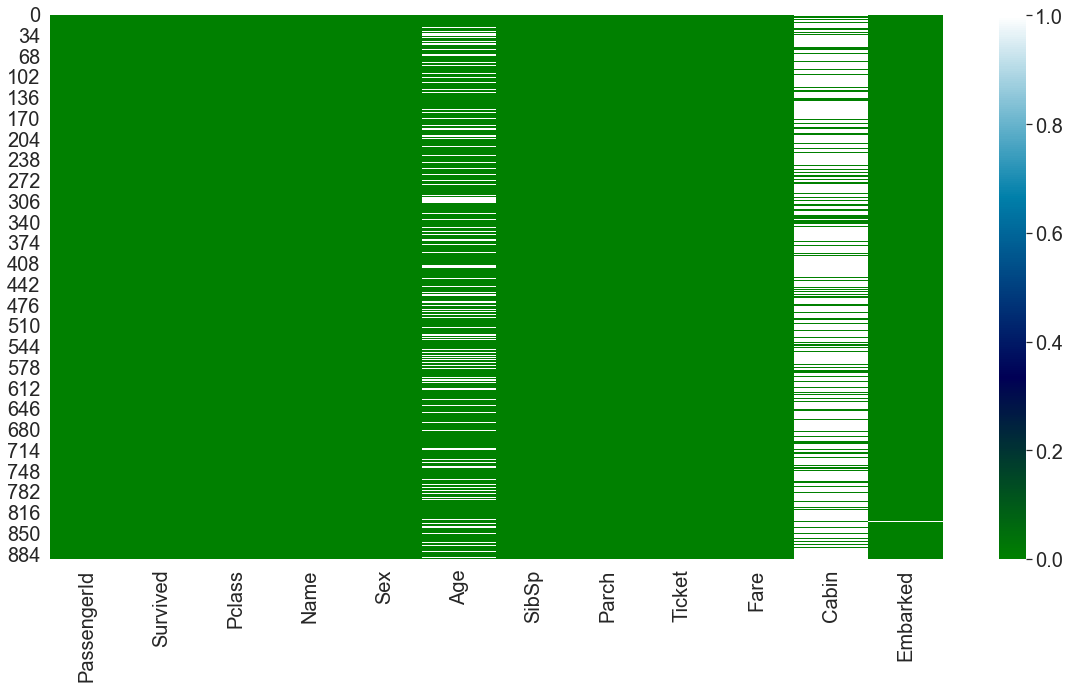

In [ ]:
root_dir = r'C:\Users\97250\ML Assignments\Assignment1'
titanic_train = pd.read_csv(root_dir + r'\train.csv')
titanic_train.info()
sns.heatmap(data=titanic_train.isnull(), cmap='ocean')

I can see that only Age, Cabin and Embarked have missing values in the data.

1. Age: I choose to replace the missing ages with a mean.
1. Cabin: I'll need to research it further.
1. Embarked: because such a small precentage of data is missing for this parameter, I'll just assign it randomly.

First of all I changed all missing values into np.NaN

In [ ]:
titanic_train.replace('', np.NaN, inplace=True)
titanic_train.fillna(np.NaN, inplace=True)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Age & Embarked 
filling the missing values as I mentioned above.

In [ ]:
mean_age = round(titanic_train['Age'].dropna().mean()) #mean age of existed ages in the data
titanic_train['Age'].fillna(mean_age, inplace=True)
df_not_null = titanic_train[~titanic_train['Embarked'].isnull()]
options = np.random.choice(df_not_null['Embarked']) #get random value of all possibles values in Embarked feature
titanic_train['Embarked'] = titanic_train['Embarked'].apply( \
lambda x: options if pd.isnull(x) else x)
titanic_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

### Cabin
It looks that cabin feature is missing a lot of values so before removing that feature I will research it for being sure about removal.

In [ ]:
died_with_cabin_vals = sum(1 for x,y in zip(titanic_train['Survived'], titanic_train['Cabin']) \
if x == 0 and str(y) != 'nan') #all not survived passengers with cabin values in the data
survived_with_cabin_vals = sum(1 for x,y in zip(titanic_train['Survived'], titanic_train['Cabin']) \
if x == 1 and str(y) != 'nan') #all survived passengers with cabin values in the data
died_total = sum(1 for x in titanic_train['Survived'] if x == 0) 
survived_total = titanic_train.shape[0] - died_total 
survived_WCV_per = (survived_with_cabin_vals/survived_total) * 100 
#survived with cabin values out of total survivals percentage
died_WCV_per = (died_with_cabin_vals/died_total) * 100 
#not survived with cabin values out of total survivals percentage
survived_WCV_per_total = (survived_with_cabin_vals/titanic_train.shape[0]) * 100 
#survived with cabin values out of total passengers percentage 
died_WCV_per_total = (died_with_cabin_vals/titanic_train.shape[0]) * 100
#not survived with cabin values out of total passengers percentage 
print('Died with Cabin values from died total - {:.3f}%'.format(died_WCV_per))
print('Survived with Cabin values from survived total - {:.3f}%'.format(survived_WCV_per))
print('Died with Cabin values from total passengers - {:.3f}%'.format(died_WCV_per_total))
print('Survived with Cabin values from total passengers - {:.3f}%'.format(survived_WCV_per_total))
print('Died in total - {}'.format(died_total))
print('Survived in total - {}'.format(survived_total))

Died with Cabin values from died total - 12.386%
Survived with Cabin values from survived total - 39.766%
Died with Cabin values from total passengers - 7.632%
Survived with Cabin values from total passengers - 15.264%
Died in total - 549
Survived in total - 342


Something very interesting emerges! although overall there is an almost x2 chance to not-survive, if I look at the data that does contain Cabin information it is the complete opposite!

So it seems Cabin is relevant! I'll just have to tweak it to be binary to tell us if we do have info or not.

In [ ]:
binary_cabin = [1 if str(x) != 'nan' else 0 for x in titanic_train['Cabin'].tolist()]
titanic_train.replace(titanic_train['Cabin'].tolist(), binary_cabin, inplace=True)
display(titanic_train.isna().any(), titanic_train)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,C


As we can see there is no missing values anymore and Cabin feature has been changed into binary data

## Researching the data
The next step is to research the data I gaved and try to understand the different features and how they may effect the output.

Our output for this model is didSurvive()? True/False - 1/0

Now lets draw some plots to see if I recognize any correlations between the features.

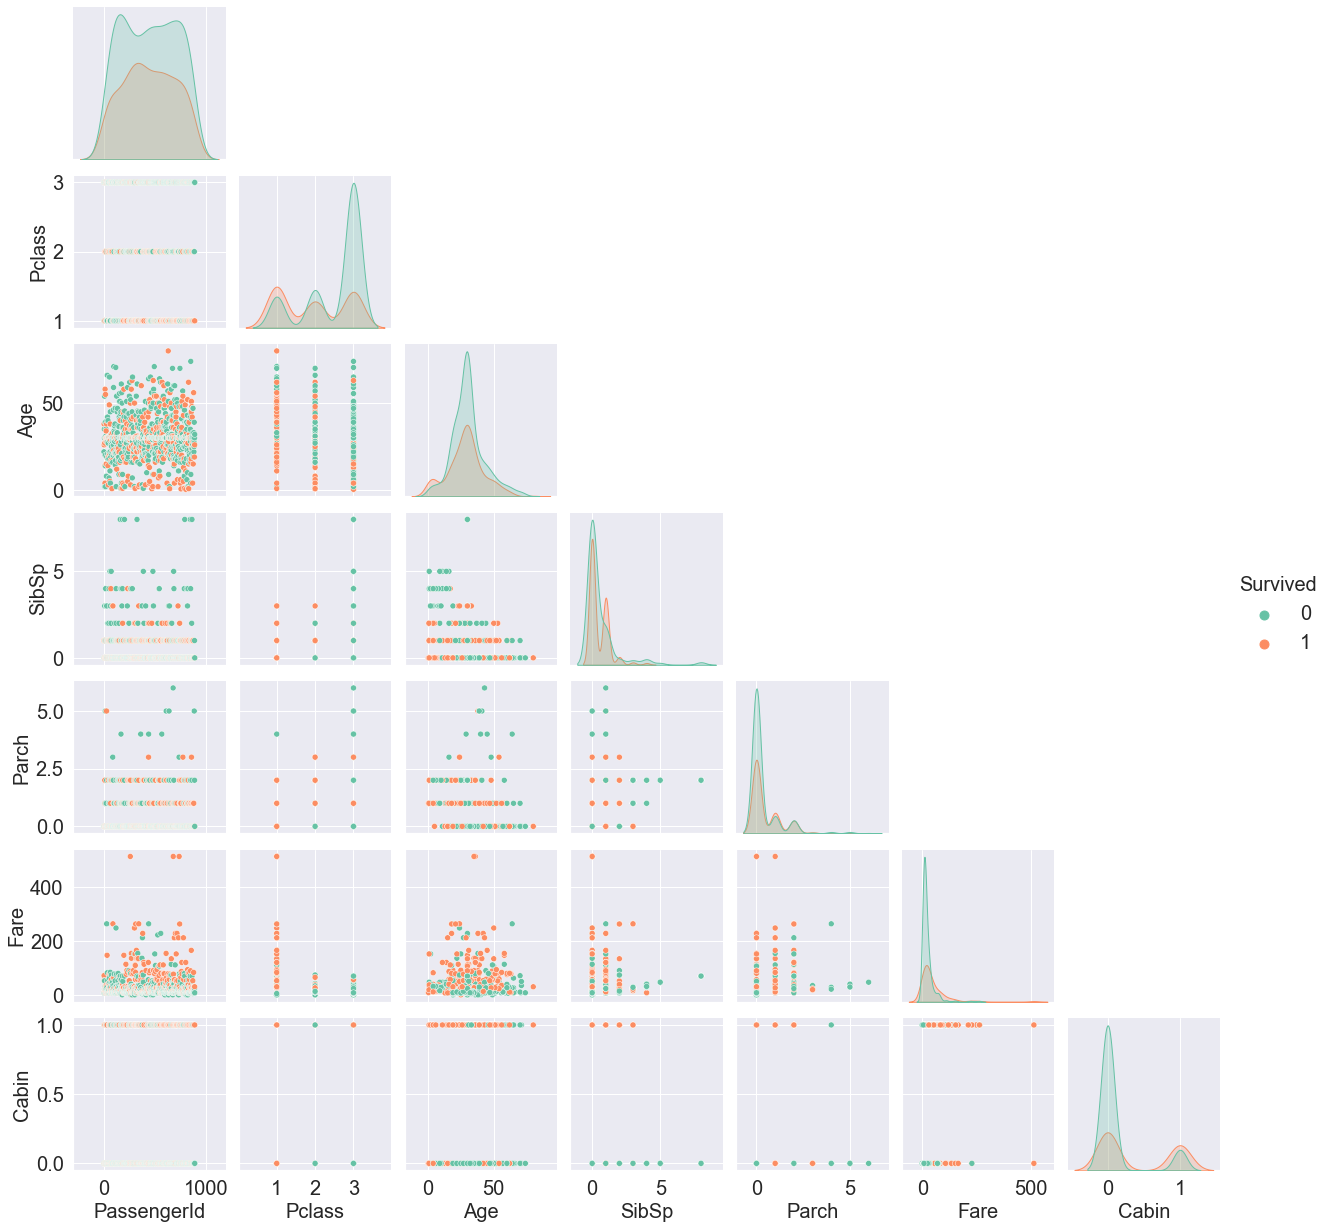

In [ ]:
sns.pairplot(titanic_train, hue='Survived', corner=True, palette='Set2')

**A very distinct features jump immediately**

1. You are distinctively more likely to die depending on your Pclass, especially if you are 3rd Pclass.
1. You are distinctively more likely to die depending on your Fare, the lower price you paid the lower chance to survive.
1. As we recognized before, having a cabin data increases yout survival chance.

Let's compute each feature I mentioned above and Embarked feature mean of values depending of survival chance

In [ ]:
pclass_chance = titanic_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
fare_chance = titanic_train[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean()
cabin_chance = titanic_train[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean()
embarked_chance = titanic_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
display(pclass_chance, fare_chance, cabin_chance, embarked_chance)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,Fare,Survived
0,0.0000,0.066667
1,4.0125,0.000000
2,5.0000,0.000000
3,6.2375,0.000000
4,6.4375,0.000000
...,...,...
243,227.5250,0.750000
244,247.5208,0.500000
245,262.3750,1.000000
246,263.0000,0.500000


,Cabin,Survived
0,0,0.299854
1,1,0.666667


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


It also kind of seems like the more relatives you have onboard the more likely you are to die but, I will also noticed that passengers with no relatives onboard at all are less likely to survive.
I decided to add a binary feature called 'Relatives' that represent if you have relatives onboard. 
Finally let's check the Sex feature following a suspicious hiding data about gender. 

,Relatives,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


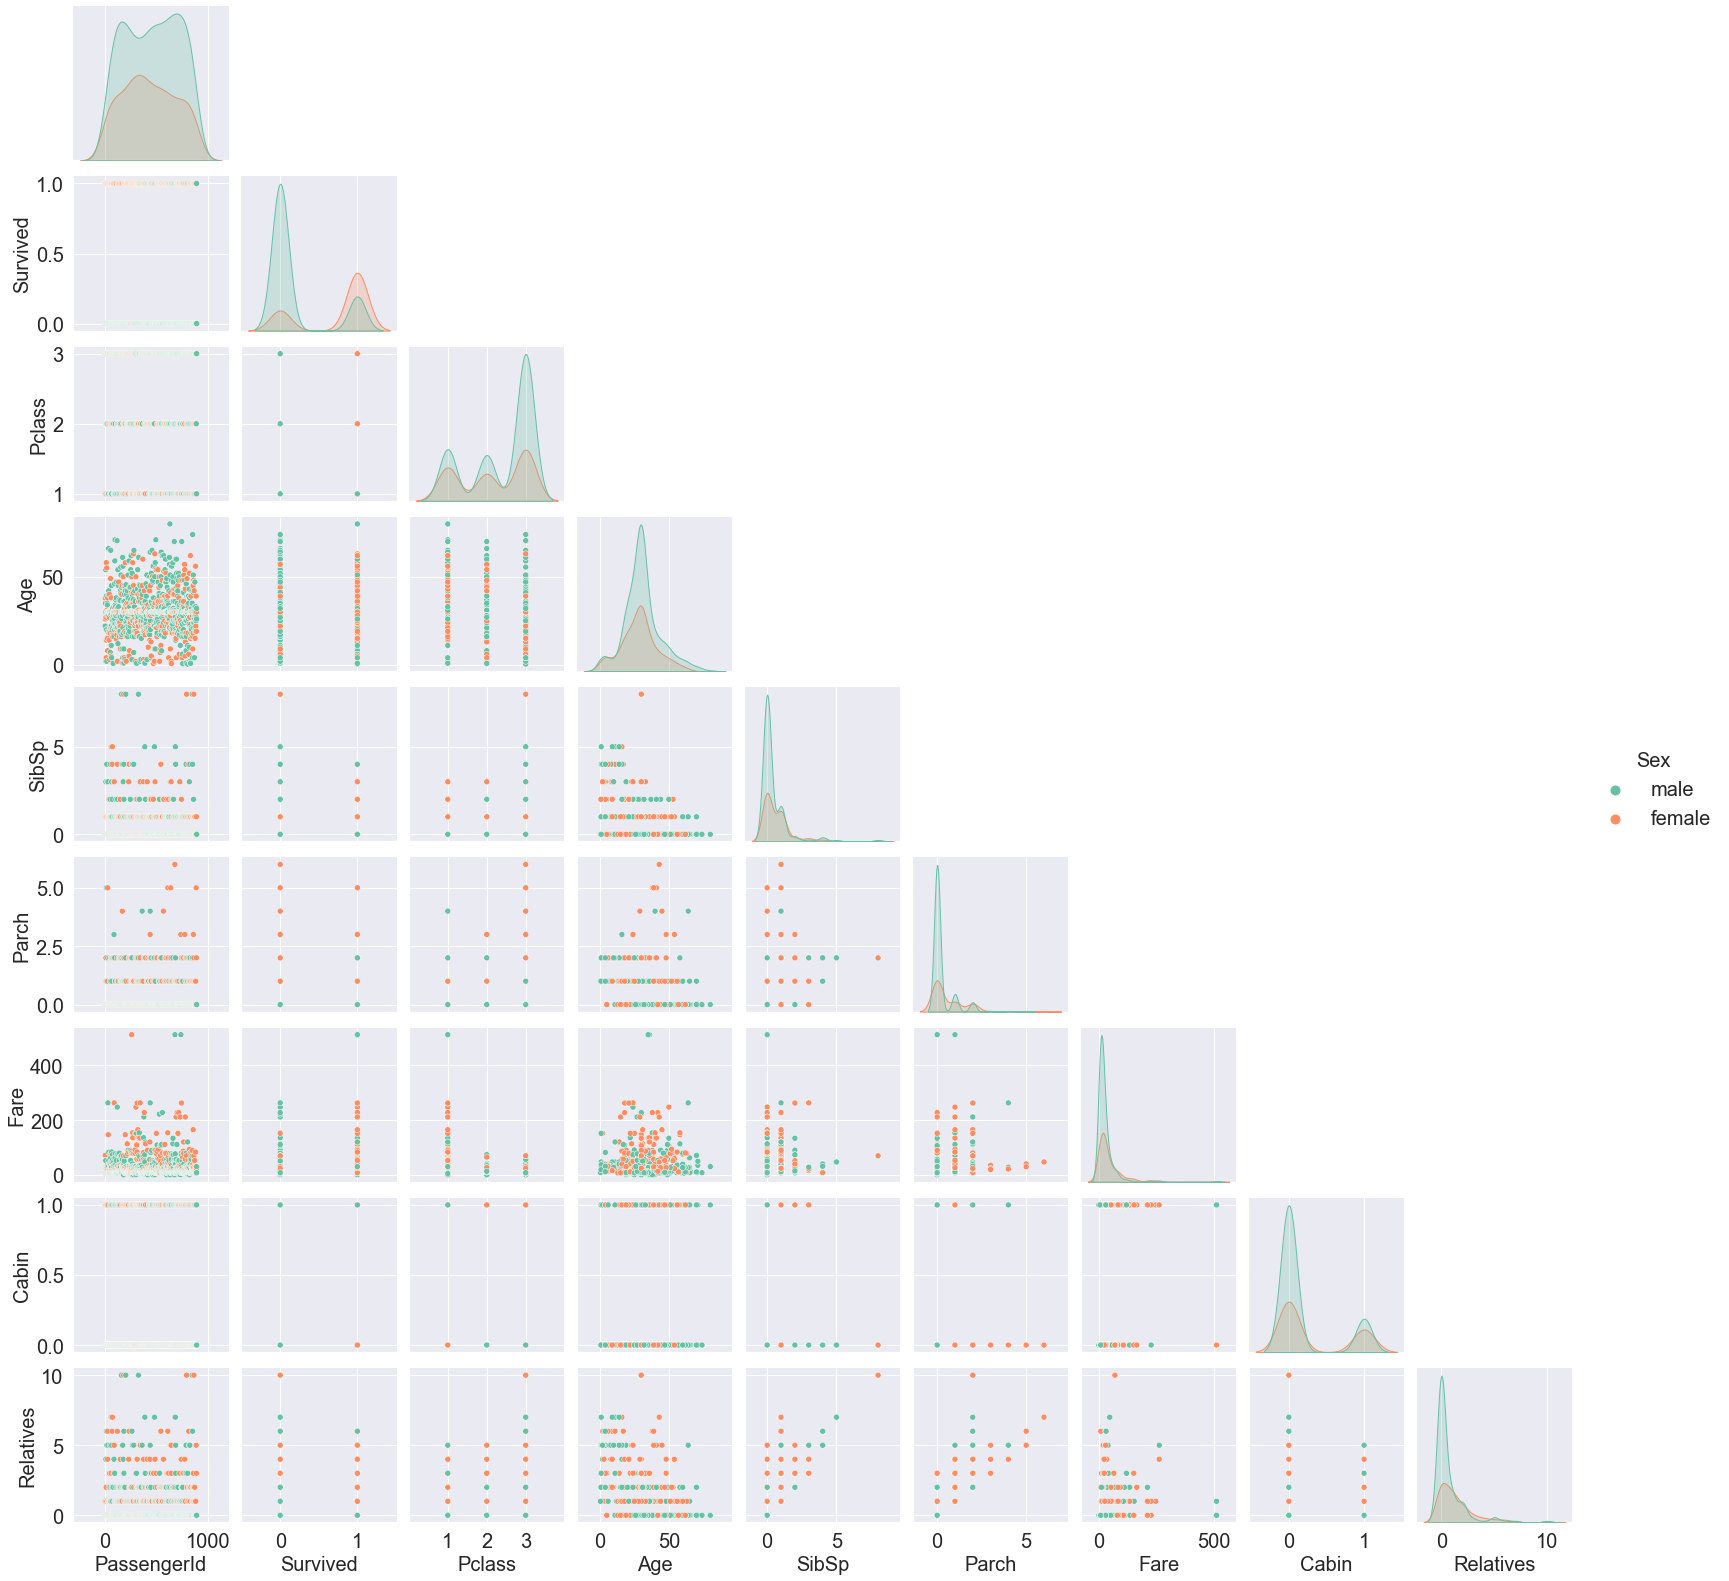

In [ ]:
relatives = [x+y for x,y in zip(titanic_train['SibSp'], titanic_train['Parch'])]
titanic_train['Relatives'] = relatives
relatives_chance = titanic_train[['Relatives', 'Survived']].groupby(['Relatives'], as_index=False).mean()
display(relatives_chance)
sns.pairplot(titanic_train, hue='Sex', corner=True, palette='Set2')

As suspected, mostly female survived.

Let's try and see what about correlations in the data.

<AxesSubplot:>

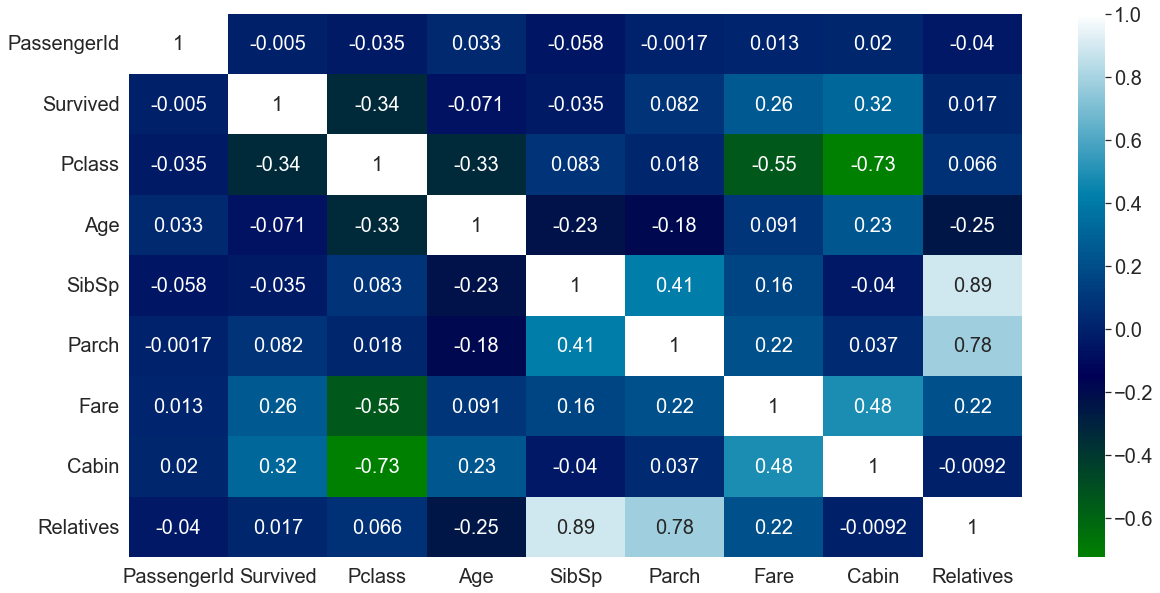

In [ ]:
corr = titanic_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.ocean)

The fact that there is a correlation of 0.41 between Parch and SibSb gives us more credit to merge them when data engineering.

Also we can see that there is a slight correlation between your Fare and Surviving chance.

Finally as I concluded from the 0.32 correlation that there is a slight correlation between cabin info existing and survival chance as well the fact that if you paid a large fare, you are likely to have a cabin info.

### Looking at names and finding titles

So I've noticed that the data contains titles such as Mrs. and Captain, I think that this data can further help us put an emphasis on the gender as well as status of a person so I want to add it to my features.

In [ ]:
# Extract the name titles
titles = titanic_train['Name'].str.extract(' ([a-zA-Z]+)\.')
titanic_train['Title'] = titles
# The following titles only appear a short amount so lets just merge them into one category
titanic_train['Title'] = titanic_train['Title'].replace(['Capt', 'Col', 'Dr', 'Lady', 'Rev', 'Dona', \
'Mme', 'Countess', 'Don', 'Major', 'Sir', 'Jonkheer', 'Mlle'], 'Other')
titanic_train['Title'] = titanic_train['Title'].replace('Ms', 'Miss')
# 'Ms title only appears a few times and she always survives so i'm just gonna merge it with Miss - same meaning anyway
# Show a table of the mean of people who survived by title.
rate = titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
titanic_train.replace(dict([(x,y) for x,y in zip(rate['Title'], rate['Survived'])]), inplace=True)
# replace the titles with the acording survival mean from the table we got above!
display(rate)

,Title,Survived
0,Master,0.575000
1,Miss,0.699454
2,Mr,0.156673
3,Mrs,0.792000
4,Other,0.423077


## Data research conclusion
lets conclude what we've learned. The following seem to have a higher chance of survival:

* Women (distinct title)
* 1st Class
* Large fare
* Cabin info exists
* Embarked from Chenbourg - 'C'
Therefore our feature engineering is going to focus mostly on 'Social-Economical' status, Sex, and title.

## Data engineering
Lets add a few features to put extra 'weight' on certain parameters that we've seen that correlate with survival.

I'll start by giving a numerical definer to features like Sex and Embarked. For 'Embarked' I'm going to assign the number according to the survival mean we found.

Then I want to drop the names, ids and tickets because they probably don't have any significance to the survival chances or any that I can think of as useful in the features at least.

**[update]** After lots of testing I've found out that using a MinMaxScaler to Standerdize the data improves the score and model predictions on the test!

Also I've got a 1% improvement in the model by using the Feature-to-Survival Mean rate as a metric in the data instead of using a random categorial number.

In [ ]:
from sklearn.preprocessing import MinMaxScaler #for data standartization - for Age and Fare

new_sex = [1 if x=='female' else 0 for x in titanic_train['Sex']] 
titanic_train.replace(titanic_train['Sex'].tolist(), new_sex, inplace=True)
titanic_train.replace(dict([(x,y) for x,y in \
zip(embarked_chance['Embarked'], embarked_chance['Survived'])]), inplace=True)

mm_scaler = MinMaxScaler()
age_fare = mm_scaler.fit_transform(titanic_train[['Age', 'Fare']])
titanic_train['Age'] = age_fare.copy()
titanic_train['Fare'] = age_fare.copy()

fpc = [(x/y) + z for x,y,z in zip(titanic_train['Fare'], titanic_train['Pclass'], titanic_train['Cabin'])]
titanic_train['FPC'] = fpc
lonely = [1 if x==0 else 0 for x in titanic_train['Relatives']]
titanic_train['Lonely'] = lonely
titanic_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
display(titanic_train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,Title,FPC,Lonely
0,0,3,0,0.271174,1,0,0.271174,0,0.339009,1,0.156673,0.090391,0
1,1,1,1,0.472229,1,0,0.472229,1,0.553571,1,0.792000,1.472229,0
2,1,3,1,0.321438,0,0,0.321438,0,0.339009,0,0.699454,0.107146,1
3,1,1,1,0.434531,1,0,0.434531,1,0.339009,1,0.792000,1.434531,0
4,0,3,0,0.434531,0,0,0.434531,0,0.339009,0,0.156673,0.144844,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0.334004,0,0,0.334004,0,0.339009,0,0.423077,0.167002,1
887,1,1,1,0.233476,0,0,0.233476,1,0.339009,0,0.699454,1.233476,1
888,0,3,1,0.371701,1,2,0.371701,0,0.339009,3,0.699454,0.123900,0
889,1,1,0,0.321438,0,0,0.321438,1,0.553571,0,0.156673,1.321438,1


You can notice that I've done some editing to the data such as derving it by certain features and scalars, this is because I want to normalize all the features to be in an approximate scale of 0-10.

**Preparing the data for training and validating**

Lets split the data to train and valid to test out how well we do. But before that we need to seperate the target from the features!

In [ ]:
from sklearn import model_selection
t = titanic_train['Survived'].copy()
titanic_train.drop('Survived', axis=1, inplace=True)
x_train, x_val, y_train, y_val = model_selection.train_test_split(titanic_train, t, test_size=0.2, random_state=42)

## Testing the models
I've use sklearn's libraries to create the 2 different models we were allowed to use in this assignment in order to compare the scores of the 2 and see which one does better.

Unrelated to features, activation, solver, iters or seed - **it seems that the Logistic Regression model does better every time.**

The reason for it is because our data consists of mostly categorial and binary values rather than ordinal ones and that is the 'specialty' of logistic regressions and the reason it preforms better than SGD.

And thus I know which model I'm going to use for the test group.

In [ ]:
from sklearn import neural_network, linear_model

lr_model = linear_model.LogisticRegression().fit(x_train, y_train)
sgd_model = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=50000)\
.fit(x_train, y_train)

print('Logistic Regression - Accuracy on training: {}'.format(lr_model.score(x_train, y_train)))
print('Logistic Regression - Accuracy on validation: {}'.format(lr_model.score(x_val, y_val)))
print('SGD - Accuracy on training: {}'.format(sgd_model.score(x_train, y_train)))
print('SGD - Accuracy on training: {}'.format(sgd_model.score(x_val, y_val)))

Logistic Regression - Accuracy on training: 0.8300561797752809
Logistic Regression - Accuracy on validation: 0.8212290502793296
SGD - Accuracy on training: 0.773876404494382
SGD - Accuracy on training: 0.7430167597765364


## Confusion Matrix

Lets compute the confusion matrix and some **KPI's**

In [ ]:
from sklearn import pipeline, metrics, preprocessing

model_pipe = pipeline.make_pipeline(mm_scaler, lr_model).fit(x_train, y_train)
w_train = model_pipe.predict(x_train)
w_val = model_pipe.predict(x_val)
cm_train = metrics.confusion_matrix(y_train, w_train)
cm_val = metrics.confusion_matrix(y_val, w_val)

print('cm_train')
print(cm_train)
print('cm_val')
print(cm_val)

cm_train
[[391  53]
 [ 66 202]]
cm_val
[[90 15]
 [17 57]]


In [ ]:
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()

# calculate precision, recall, specificity, fpr and accuracy
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

print(f'Train: precision {precision(cm_train):.2f}, recall {recall(cm_train):.2f}, specificity {specificity(cm_train):.2f}, fpr {fpr(cm_train):.2f}, accuracy {accuracy(cm_train):.2f}')
print(f'Val:   precision {precision(cm_val):.2f}, recall {recall(cm_val):.2f}, specificity {specificity(cm_val):.2f}, fpr {fpr(cm_val):.2f}, accuracy {accuracy(cm_val):.2f}')

Train: precision 0.79, recall 0.75, specificity 0.88, fpr 0.12, accuracy 0.83
Val:   precision 0.79, recall 0.77, specificity 0.86, fpr 0.14, accuracy 0.82


In [ ]:
# calculate f1 and balanced accuracy
def f1(cm):
    precision_calc = precision(cm)
    recall_calc = recall(cm)
    return (2*precision_calc*recall_calc)/(precision_calc+recall_calc)

def balanced_accuracy(cm):
    recall_calc = recall(cm)
    specificity_calc = specificity(cm)
    return (recall_calc+specificity_calc)/2

print(f'Train: f1 {f1(cm_train):.2f}, balanced_accuracy {balanced_accuracy(cm_train):.2f}')
print(f'Val:   f1 {f1(cm_val):.2f}, balanced_accuracy {balanced_accuracy(cm_val):.2f}')

Train: f1 0.77, balanced_accuracy 0.82
Val:   f1 0.78, balanced_accuracy 0.81


**As we can see the results are high and this is good news.
We can see that the model has high recall & precision so as the accuracy and balanced accuracy.**

## Final Model

I've noticed that there are rows that contain the EXACT SAME features but have different results. Therefore there will never be a 100% prediction because we can conclude that if such a scenario happens - our data gathering is incomplete / lacking.

**Training the final model on the whole data**

So after I'm satisfied with the results of the Logistic Regression model I'm going to create a model that has train on the whole set for maximum efficency.

In [ ]:
model = linear_model.LogisticRegression().fit(titanic_train, t)

## Creating the final test file 'submission.csv'

In this section I'm going to repeat all the process above but this time on the test group.

Let's create a function that prepares the data the same way we prepared the test set.

In [ ]:
def prepare_data(df: pd.DataFrame):
    df.replace('', np.NaN, inplace=True)
    df.fillna(np.NaN, inplace=True)
    binary_cabin = [1 if str(x) != 'nan' else 0 for x in df['Cabin'].tolist()]
    df.replace(df['Cabin'].tolist(), binary_cabin, inplace=True)
    relatives = [x+y for x,y in zip(df['SibSp'], df['Parch'])]
    df['Relatives'] = relatives
    titles = df['Name'].str.extract(' ([a-zA-Z]+)\.')
    df['Title'] = titles
    df['Title'] = df['Title'].replace(['Capt', 'Col', 'Dr', 'Lady', 'Rev', 'Dona', \
    'Mme', 'Countess', 'Don', 'Major', 'Sir', 'Jonkheer', 'Mlle'], 'Other')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df.replace(dict([(x,y) for x,y in zip(rate['Title'], rate['Survived'])]), inplace=True)
    new_sex = [1 if x=='female' else 0 for x in df['Sex']]
    df.replace(df['Sex'].tolist(), new_sex, inplace=True)
    df.replace(dict([(x,y) for x,y in zip(embarked_chance['Embarked'], embarked_chance['Survived'])]), inplace=True)

    age_fare = mm_scaler.fit_transform(df[['Age', 'Fare']])
    df['Age'] = age_fare.copy()
    df['Fare'] = age_fare.copy()

    fpc = [(x/y) + z for x,y,z in zip(df['Fare'], df['Pclass'], df['Cabin'])]
    df['FPC'] = fpc
    lonely = [1 if x==0 else 0 for x in df['Relatives']]
    df['Lonely'] = lonely
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

<AxesSubplot:>

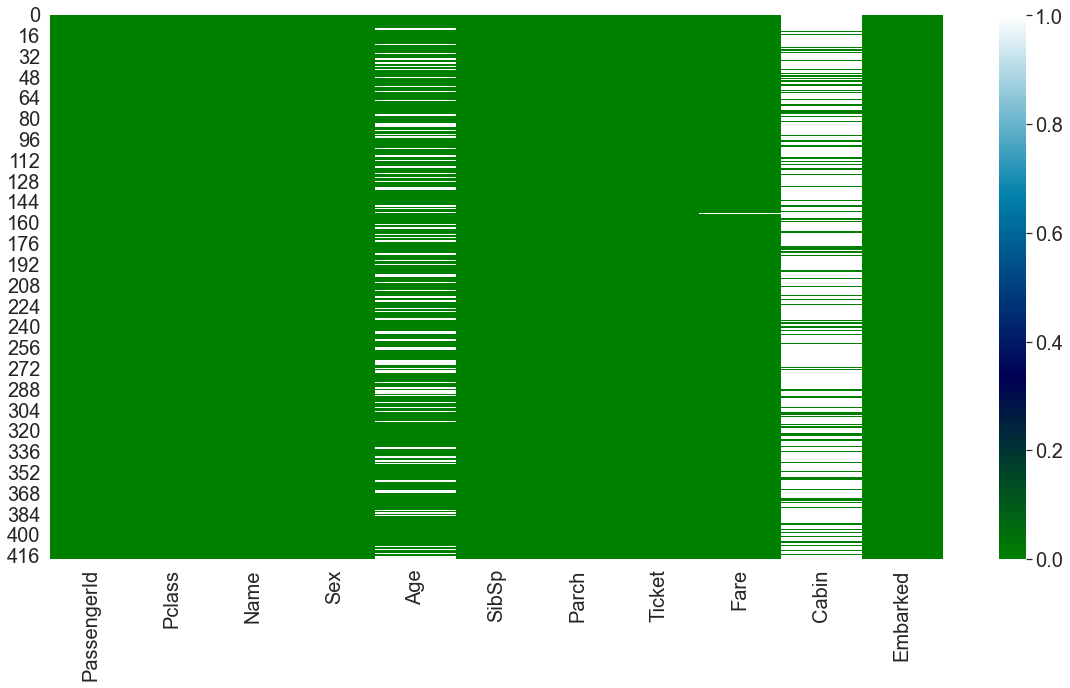

In [ ]:
test_data = pd.read_csv(root_dir + r'\test.csv')
display(test_data.isna().any())
sns.heatmap(data=test_data.isnull(), cmap='ocean')

In [ ]:
#Fare is missing so I just add a mean, everything else as I did before for age and cabin
mean_age = round(test_data['Age'].dropna().mean())
test_data['Age'].fillna(mean_age, inplace=True)
fare_mean = round(test_data['Fare'].dropna().mean())
test_data['Fare'].fillna(fare_mean, inplace=True)

# now I can pass it safely to the function we created and it will handle it propertly.
prepare_data(test_data)
display(test_data.isna().any(), test_data)

Pclass       False
Sex          False
Age          False
SibSp        False
Parch        False
Fare         False
Cabin        False
Embarked     False
Relatives    False
Title        False
FPC          False
Lonely       False
dtype: bool

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,Title,FPC,Lonely
0,3,0,0.452723,0,0,0.452723,0,0.389610,0,0.156673,0.150908,1
1,3,1,0.617566,1,0,0.617566,0,0.339009,1,0.792000,0.205855,0
2,2,0,0.815377,0,0,0.815377,0,0.389610,0,0.156673,0.407688,1
3,3,0,0.353818,0,0,0.353818,0,0.339009,0,0.156673,0.117939,1
4,3,1,0.287881,1,1,0.287881,0,0.339009,2,0.792000,0.095960,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0.393380,0,0,0.393380,0,0.339009,0,0.156673,0.131127,1
414,1,1,0.512066,0,0,0.512066,1,0.553571,0,0.423077,1.512066,1
415,3,0,0.505473,0,0,0.505473,0,0.339009,0,0.156673,0.168491,1
416,3,0,0.393380,0,0,0.393380,0,0.339009,0,0.156673,0.131127,1


**The final result**

Let's start the true test on the unknown values! (using the logistic Regression model of course)

In [ ]:
prediction = pd.read_csv(root_dir + r'\test.csv')
prediction['Survived'] = model.predict(test_data)
prediction = prediction[['PassengerId', 'Survived']]
prediction.to_csv(root_dir + r'\submission.csv', index=False)
display(prediction)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Resluts Comparison

Lets compare the model results with the actual results and represent it with pd.compare 

In [ ]:
actual = pd.read_csv(root_dir + r'\gender_submission.csv')
comparison = prediction.compare(actual, align_axis=0, keep_equal=True, keep_shape=True)
prediction = prediction['Survived'].tolist()
actual = actual['Survived'].tolist()
predicted_corrected = sum([1 if prediction[x]==actual[y] else 0 for x,y in zip(prediction, actual)])
corrected_per = (predicted_corrected/len(prediction)) * 100
print(f'My model predicted corrected - {predicted_corrected}/{len(prediction)} = {corrected_per:.3f}%')
display(comparison)

My model predicted corrected - 398/418 = 95.215%


PassengerId  Survived
0   self           892         0
    other          892         0
1   self           893         1
    other          893         1
2   self           894         0
...                ...       ...
415 other         1307         0
416 self          1308         0
    other         1308         0
417 self          1309         0
    other         1309         0

[836 rows x 2 columns]

**A very suprising results, eventhough the model achieves 0.83 score on the train and 0.82 score on the valid the model gets 0.95 score on the test set**

## Kaggle Submissions & Place on the leaderboard


![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)

# Summary
Throughtout the whole training I did a lot of testing with normalizing different features, merging others and creating new ones.

Here are some of the things that did not work:

* I tried normalizing the Parch and SibSp features because they were outside the scale of 0-4 of the other features by classifing them, creating a new merged feature and dropping them. It did significantly worse on the test although being a 2% better on the training!
* I tried setting the 'Embarked' feature using the 'OneHot' method but it significantly dropped the score on the test set (although doing overall the same on the train set) - So I researched it further and discovered that people from 'C' have a better chance of survival so I decided to set a metric accordingly to the feature.
* I tried changing mean to median when filling the Age feature but it did not impact the learning of the algorithm at all it seems.
* I tried standartizing the Parch and SibSp which also resulted in a slightly worse prediction on the test! I resulted to leave them untouched.

I learned that normalizing the data on the one hand has a very strong impact on the SGD model as we've learned in class but it really depends on the data and test to know how it will impact the overall predictions of the model - some features are better left untouched.

I learned the high importance of data engineering and data research especially which is a huge part of importance to the success of your model.

Finally I discovered that rather than using generic categorial integers or the OneHot method, it is sometimes better to research the correlation to the desired output of the said feature and assignt this ratio to it as a metric (as I did with the Title and Embarked feature).

### Sources

* Pandas Groupby: https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups
* Standrtization: https://colab.research.google.com/github/JL1829/turbo-funicular/blob/master/_notebooks/2020-09-19-About%20Feature%20Scaling%20and%20Normalization.ipynb#scrollTo=_SOhb-J76CBv
* Inspiration to the data analysis and feature engineering: https://www.kaggle.com/startupsci/titanic-data-science-solutionshttps://towardsdatascience.com/comprehensive-beginners-guide-to-kaggle-titanic-survival-prediction-competition-solution-21c5be2cec2c